In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
! ls -ltSh ./data/

total 1065520
-rw-r--r--@ 1 sagar  staff   223M Aug  9 16:05 app_usage.csv
-rw-r--r--@ 1 sagar  staff   145M Sep  8 11:27 app_metadata.csv
-rw-r--r--@ 1 sagar  staff   130M Sep  8 17:39 app_installs.csv
-rw-r--r--@ 1 sagar  staff    16M Aug  9 16:06 user_metadata.csv
-rw-r--r--@ 1 sagar  staff   4.1M Aug  9 16:01 actual_set.csv
-rw-r--r--@ 1 sagar  staff   2.2M Sep  8 11:49 sample_submission.csv
-rw-r--r--@ 1 sagar  staff   274K Aug  9 16:06 validation_data.csv
-rw-r--r--@ 1 sagar  staff   692B Sep  8 17:41 IndusOS_Data Dictionary.csv


In [3]:
! wc -l ./data/app_usage.csv

 7569650 ./data/app_usage.csv


In [4]:
df_app_usage = pd.read_csv("./data/app_usage.csv")

In [5]:
df_app_usage["time_spent"] = df_app_usage["time_spent"] / 3600  # convert to hours

In [6]:
df_app_usage["app_use_date"] = pd.to_datetime(df_app_usage["app_use_date"])

In [7]:
df_app_usage

,app_use_date,uid,item_id,time_spent
0,2022-07-31,185459,601235,605.614167
1,2022-07-31,164721,601235,1347.483056
2,2022-07-25,22949,601235,285.198056
3,2022-07-26,1773,601235,116.603611
4,2022-07-29,12539,601235,447.067778
...,...,...,...,...
7569644,2022-07-31,149113,141827,15.344722
7569645,2022-07-30,90717,160056,225.179444
7569646,2022-07-29,205313,160056,14.168333
7569647,2022-07-30,217754,753277,491.966667


In [8]:
df_app_usage.dtypes

app_use_date    datetime64[ns]
uid                      int64
item_id                  int64
time_spent             float64
dtype: object

assuming time spent is in seconds

# app_usage

## uid

In [9]:
df_app_usage["uid"].nunique()

238640

## item_id

In [10]:
df_app_usage["item_id"].nunique()

50679

## date

In [11]:
df_app_usage["app_use_date"].dt.year.unique()

array([2022])

In [12]:
df_app_usage["app_use_date"].dt.month.unique()

array([7])

In [13]:
np.sort(df_app_usage["app_use_date"].dt.day.unique())

array([25, 26, 27, 28, 29, 30, 31])

In [14]:
df_app_usage["uid"].value_counts().head(10)

194958    258
42337     257
218895    255
210942    248
125082    247
159922    244
194044    231
161297    226
174622    226
100345    221
Name: uid, dtype: int64

In [15]:
df_app_usage["item_id"].value_counts().head(10)

20875     1111767
5526       502772
25349      442085
145569     237136
62222      211751
145082     154038
589378     137077
55824      115264
55857      108118
69229      105557
Name: item_id, dtype: int64

## per user x apps

In [16]:
df_unique_items_per_user = (
    df_app_usage.groupby("uid", as_index=False)
    .agg(nunique_items=("item_id", "nunique"))
    .sort_values(by="nunique_items", ignore_index=True, ascending=False)
)
df_unique_items_per_user

,uid,nunique_items
0,42337,257
1,158521,196
2,141072,181
3,161297,165
4,210942,164
...,...,...
238635,91866,1
238636,141506,1
238637,271549,1
238638,191683,1


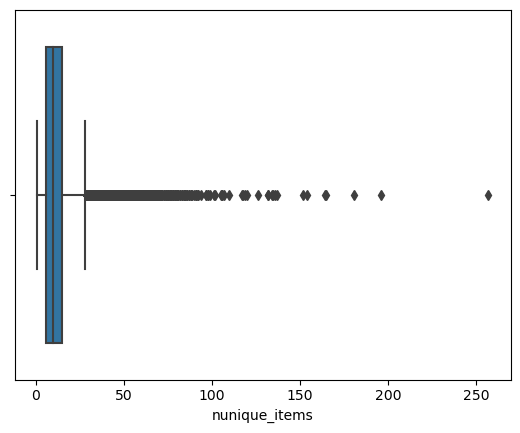

In [17]:
sns.boxplot(x="nunique_items", data=df_unique_items_per_user)
plt.show()

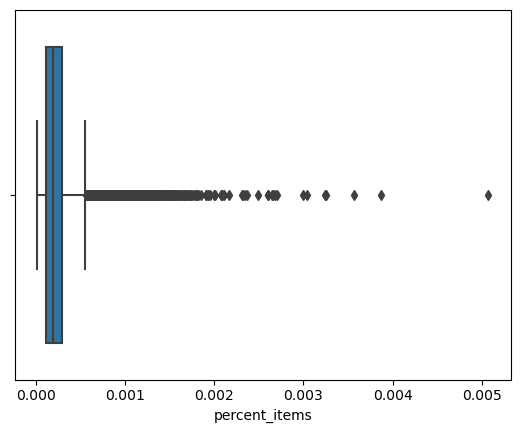

In [18]:
df_unique_items_per_user["percent_items"] = (
    df_unique_items_per_user["nunique_items"] / df_app_usage["item_id"].nunique()
)

sns.boxplot(x="percent_items", data=df_unique_items_per_user)
plt.show()

## per item x users

In [19]:
df_unique_users_per_item = (
    df_app_usage.groupby("item_id", as_index=False)
    .agg(nunique_users=("uid", "nunique"))
    .sort_values(by="nunique_users", ignore_index=True, ascending=False)
)
df_unique_users_per_item

,item_id,nunique_users
0,20875,214482
1,25349,106537
2,5526,98841
3,145569,75527
4,62222,70298
...,...,...
50674,757488,1
50675,757472,1
50676,757460,1
50677,757347,1


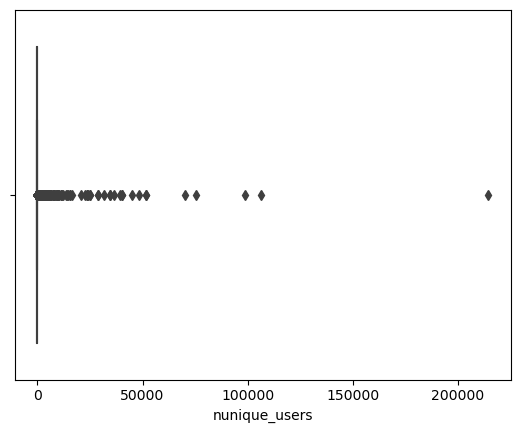

In [20]:
sns.boxplot(x="nunique_users", data=df_unique_users_per_item)
plt.show()

1. There are some apps that are being used by majority of the users
1. There is no point in recommending such items it seems like these are utility or pre-installed apps that the user has
1. We can skip these items altogether from recommendations


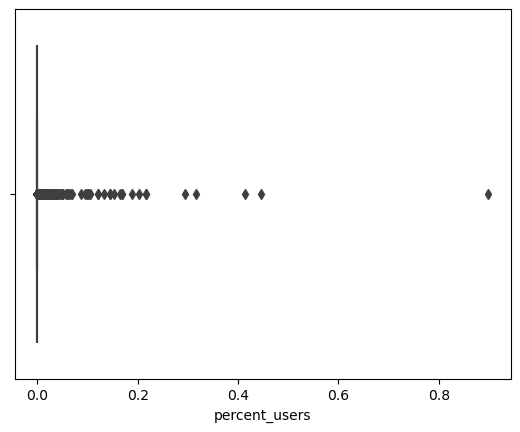

In [21]:
df_unique_users_per_item["percent_users"] = (
    df_unique_users_per_item["nunique_users"] / df_app_usage["uid"].nunique()
)

sns.boxplot(x="percent_users", data=df_unique_users_per_item)
plt.show()

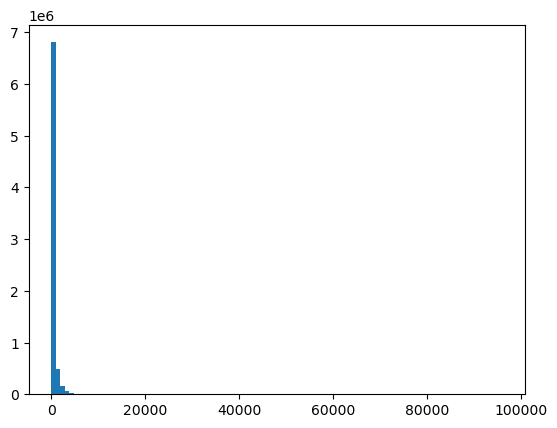

In [22]:
plt.hist(df_app_usage["time_spent"], bins=100)
plt.show()

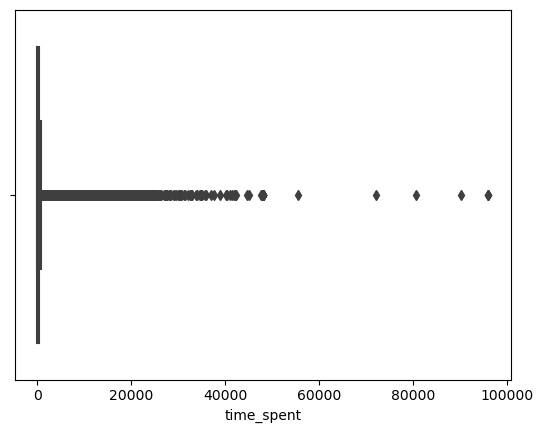

In [23]:
sns.boxplot(x="time_spent", data=df_app_usage)
plt.show()

## unique users interacting on daily basis

In [24]:
df_app_usage.groupby("app_use_date").agg(uid_count=("uid", "nunique"))

,uid_count
app_use_date,
2022-07-25,181090
2022-07-26,188634
2022-07-27,190549
2022-07-28,192654
2022-07-29,194293
2022-07-30,197013
2022-07-31,200691


## unique items being interacted with on daily basis

In [25]:
df_app_usage.groupby("app_use_date").agg(item_id_count=("item_id", "nunique"))

,item_id_count
app_use_date,
2022-07-25,21518
2022-07-26,24033
2022-07-27,24514
2022-07-28,24592
2022-07-29,25041
2022-07-30,25408
2022-07-31,25874


## median app_usage_time per day

In [26]:
df_app_usage.groupby(["app_use_date"], as_index=False).agg(
    median_app_usage_time=("time_spent", "median")
)

,app_use_date,median_app_usage_time
0,2022-07-25,91.712500
1,2022-07-26,81.669722
2,2022-07-27,81.571667
3,2022-07-28,80.899028
4,2022-07-29,81.363333
5,2022-07-30,80.815833
6,2022-07-31,80.933889


## mean app_usage_time per day

In [27]:
df_app_usage.groupby(["app_use_date"], as_index=False).agg(
    mean_app_usage_time=("time_spent", "mean")
)

,app_use_date,mean_app_usage_time
0,2022-07-25,365.414905
1,2022-07-26,347.259845
2,2022-07-27,349.029364
3,2022-07-28,348.774830
4,2022-07-29,348.856208
5,2022-07-30,349.392161
6,2022-07-31,350.525219


## total interactions per day

In [28]:
df_app_usage.groupby("app_use_date", as_index=False).agg(
    interactions=("item_id", "count")
)

,app_use_date,interactions
0,2022-07-25,925491
1,2022-07-26,1067193
2,2022-07-27,1078545
3,2022-07-28,1092174
4,2022-07-29,1105597
5,2022-07-30,1132945
6,2022-07-31,1167704


# app_metadata

In [29]:
! wc -l ./data/app_metadata.csv

  102753 ./data/app_metadata.csv


In [30]:
df_app_meta = pd.read_csv(
    "./data/app_metadata.csv",
)

In [31]:
df_app_meta

,item_id,category,description
0,593676,HEALTH_AND_FITNESS,"Abs Workout, designed by professional fitness ..."
1,601235,GAME,The best building game on android is free to d...
2,860079,COMMUNICATION,Tamil Actress Stickers app has 200 + Tamil her...
3,64855,VIDEO_PLAYERS,The simplest VLC Remote you'll ever find. Peri...
4,597756,MEDICAL,This is the official mobile app of the Nationa...
...,...,...,...
98594,683377,TOOLS,endoscope app for android an app to connect wi...
98595,862905,FINANCE,Acerca de esta app<br>La App OCA está pensada ...
98596,165878,MUSIC_AND_AUDIO,This app provides free downloading of audio sh...
98597,683417,PHOTOGRAPHY,<b>Water Paint : Colour Effect</b><br><br>Want...


In [32]:
df_app_meta.dtypes

item_id        object
category       object
description    object
dtype: object

## dirty entries

In [33]:
df_app_meta[~df_app_meta["item_id"].apply(lambda x: x.isdigit())]

,item_id,category,description
1009,So,want a faster video downloader,the latest short-form videos
1010,- That b!ggest video site on earth,YouTube,Instagram
1011,- All formats supported - MP4,MP3,MAV
1012,WMV,APK,etc.
1013,With the same video resolution,improves video clarity by 30 percent,plus free panoramic sound effects.
2075,Intelligent Cloud Engine reads everything on y...,idle storage and detect useless large files f...,thus releasing plenty of free space on your d...
2076,By cleaning unnecessary processes and apps whi...,the memory booster of Multi Clean can free up...,which also saves much more battery power. Wit...
2077,This cleaner has an accelerator which can dete...,which and cause overheating. By using the mem...,it can cool down your Android device super-fast.
22874,Waterfall Live Wallpaper – beautiful free live...,set of 9 HD backgrounds,tons of settings and much more.
22875,* Suitable for 99% mobile phone devices like S...,LG,Motorola


## cleaning dirty entries

In [34]:
clean_ix = df_app_meta[df_app_meta["item_id"].apply(lambda x: x.isdigit())].index

df_app_meta = df_app_meta.loc[clean_ix, :]
df_app_meta["item_id"] = df_app_meta["item_id"].astype(int)

In [35]:
df_app_meta = df_app_meta.reset_index(drop=True)

In [36]:
df_app_meta.dtypes

item_id         int64
category       object
description    object
dtype: object

## check if one app belongs to multiple categories

In [37]:
df_app_meta["item_id"].nunique() == df_app_meta.shape[0]

True

one app belongs to only one category

## check number of categories

In [38]:
df_app_meta["category"].nunique()

37

## check number of items intersection with item inventory

In [39]:
df_app_usage["item_id"].nunique()

50679

In [40]:
len(set(df_app_usage["item_id"]).intersection(set(df_app_meta["item_id"])))

50640

In [41]:
len(set(df_app_usage["item_id"]).difference(set(df_app_meta["item_id"])))

39

In [42]:
apps_in_usage_not_in_meta = list(
    set(df_app_usage["item_id"]).difference(set(df_app_meta["item_id"]))
)

In [43]:
len(set(df_app_meta["item_id"]).difference(set(df_app_usage["item_id"])))

47942

In [44]:
50679

50679

We have metadata of all the item_ids in interactions table

## meta of apps which are in app_usage but not in app_metadata

In [45]:
df_app_meta[df_app_meta["item_id"].isin(apps_in_usage_not_in_meta)]

,item_id,category,description


## meta of apps which are additional and not present in app_usage

In [46]:
df_app_meta[~df_app_meta["item_id"].isin(set(df_app_usage["item_id"].tolist()))]

,item_id,category,description
0,593676,HEALTH_AND_FITNESS,"Abs Workout, designed by professional fitness ..."
2,860079,COMMUNICATION,Tamil Actress Stickers app has 200 + Tamil her...
3,64855,VIDEO_PLAYERS,The simplest VLC Remote you'll ever find. Peri...
5,824740,BUSINESS,Agni provides online recharge facility for mob...
6,64866,PRODUCTIVITY,"""Secret video recording camera is a spy camera..."
...,...,...,...
98576,683373,COMMUNICATION,This tool will read caller name and sms conten...
98577,683377,TOOLS,endoscope app for android an app to connect wi...
98578,862905,FINANCE,Acerca de esta app<br>La App OCA está pensada ...
98580,683417,PHOTOGRAPHY,<b>Water Paint : Colour Effect</b><br><br>Want...


## item_id and meta information of apps which are in app_usage table

In [47]:
df_app_meta[df_app_meta["item_id"].isin(set(df_app_usage["item_id"].tolist()))]

,item_id,category,description
1,601235,GAME,The best building game on android is free to d...
4,597756,MEDICAL,This is the official mobile app of the Nationa...
7,930055,EDUCATION,We bring you the power of conversational AI in...
8,860078,PRODUCTIVITY,"Digital India ka Apna CamScanner, ab Ghar pe p..."
14,651710,GAME,Escape Game Jail Prison Break is the new point...
...,...,...,...
98565,157958,HEALTH_AND_FITNESS,"Fitness &amp; Bodybuilding help you burn fat,..."
98566,601017,TOOLS,UserLAnd is an open-source app which allows yo...
98568,753277,SPORTS,This interval timer can be used for a wide ran...
98572,835283,ENTERTAINMENT,Do you like clear slimes? Want to learn how to...


## description

In [48]:
# todo

# app_installs

In [49]:
! wc -l ./data/app_installs.csv

 3767270 ./data/app_installs.csv


In [50]:
df_app_inst = pd.read_csv("./data/app_installs.csv")

In [51]:
df_app_inst

,uid,item_id,status,install_date
0,64190,593676,uninstalled,2022-07-01
1,45556,593676,uninstalled,2022-05-21
2,49642,601235,uninstalled,2022-07-07
3,1773,601235,uninstalled,2022-07-23
4,163462,601235,uninstalled,2022-04-18
...,...,...,...,...
3767264,257363,902907,uninstalled,2022-07-20
3767265,267842,902907,uninstalled,2022-05-15
3767266,200614,902907,uninstalled,2022-05-15
3767267,250849,902907,uninstalled,2022-04-25


In [52]:
df_app_inst.dtypes

uid              int64
item_id          int64
status          object
install_date    object
dtype: object

## date

In [53]:
df_app_inst["install_date"] = pd.to_datetime(df_app_inst["install_date"])

In [54]:
np.sort(df_app_inst["install_date"].dt.day.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [55]:
np.sort(df_app_inst["install_date"].dt.month.unique())

array([2, 3, 4, 5, 6, 7])

In [56]:
np.sort(df_app_inst["install_date"].dt.year.unique())

array([2022])

## status

In [57]:
df_app_inst["status"].value_counts()

uninstalled    3415552
installed       351717
Name: status, dtype: int64

In [58]:
df_app_inst["status"].unique()

array(['uninstalled', 'installed'], dtype=object)

## user_id

### checking if users in app_installs are present in interactions table 

In [59]:
df_app_inst["uid"].nunique()

211834

In [60]:
len(set(df_app_inst["uid"])) / len(
    set(df_app_inst["uid"]).union(set(df_app_usage["uid"]))
)

0.8846357831612093

there is 88% overlap in user ids of app installs and app usage tables

In [61]:
len(set(df_app_inst["uid"]).difference(set(df_app_usage["uid"])))

819

only 819 users in app installs table are not present in interactions table

In [62]:
len(set(df_app_usage["uid"]).difference(set(df_app_inst["uid"])))

27625

27625 users in app installs table are not present in app usage tables

## item_id

In [63]:
df_app_inst["item_id"].nunique()

80375

In [64]:
len(set(df_app_inst["item_id"])) / len(
    set(df_app_inst["item_id"]).union(set(df_app_usage["item_id"]))
)

0.8694829078321074

there is 86% overlap in item ids of app installs and app usage tables

In [65]:
len(set(df_app_inst["item_id"]).difference(set(df_app_usage["item_id"])))

41761

41761 items in app installs table are not present in interactions table

In [66]:
len(set(df_app_usage["item_id"]).difference(set(df_app_inst["item_id"])))

12065

12065 items in app installs table are not present in app usage tables

## status

In [67]:
df_unis = df_app_inst[df_app_inst["status"] == "uninstalled"]
df_inis = df_app_inst[df_app_inst["status"] == "installed"]

In [68]:
df_unis.shape

(3415552, 4)

In [69]:
df_inis.shape

(351717, 4)

# app install uninstall per level analysis

## ITEM level

### app uninstall percentage - item level

In [70]:
df_app_unis_global_item = (
    df_unis["item_id"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "item_id", "item_id": "num_uninstalls"})
)

df_app_unis_global_item["unis_perc_global_item"] = (
    df_app_unis_global_item["num_uninstalls"] / df_app_inst["item_id"].nunique()
)


df_app_unis_global_item

,item_id,num_uninstalls,unis_perc_global_item
0,589549,57380,0.713904
1,589378,54917,0.683260
2,589482,51221,0.637275
3,145082,33289,0.414171
4,145569,28814,0.358495
...,...,...,...
78480,830233,1,0.000012
78481,860549,1,0.000012
78482,161965,1,0.000012
78483,36653,1,0.000012


### app install percentage - item level

In [71]:
df_app_inis_global_item = (
    df_inis["item_id"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "item_id", "item_id": "num_installs"})
)

df_app_inis_global_item["inis_perc_global_item"] = (
    df_app_inis_global_item["num_installs"] / df_app_inst["item_id"].nunique()
)


df_app_inis_global_item

,item_id,num_installs,inis_perc_global_item
0,20875,31825,0.395956
1,25349,18265,0.227247
2,145569,11496,0.143030
3,589378,11129,0.138463
4,145082,10446,0.129966
...,...,...,...
14016,824987,1,0.000012
14017,124827,1,0.000012
14018,741182,1,0.000012
14019,589149,1,0.000012


## USER level

### app uninstall percentage - user level

In [72]:
df_app_unis_global_user = (
    df_unis["uid"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "uid", "uid": "num_uninstalls"})
)

df_app_unis_global_user["unis_perc_global_user"] = (
    df_app_unis_global_user["num_uninstalls"] / df_app_inst["uid"].nunique()
)


df_app_unis_global_user

,uid,num_uninstalls,unis_perc_global_user
0,197026,1021,0.004820
1,243820,1007,0.004754
2,83942,725,0.003422
3,74627,722,0.003408
4,112543,646,0.003050
...,...,...,...
208201,132145,1,0.000005
208202,209728,1,0.000005
208203,227685,1,0.000005
208204,59713,1,0.000005


### app install percentage - user level

In [73]:
df_app_inis_global_user = (
    df_inis["uid"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "uid", "uid": "num_installs"})
)

df_app_inis_global_user["inis_perc_global_user"] = (
    df_app_inis_global_user["num_installs"] / df_app_inst["uid"].nunique()
)


df_app_inis_global_user

,uid,num_installs,inis_perc_global_user
0,223221,466,0.002200
1,116589,165,0.000779
2,144677,137,0.000647
3,12,127,0.000600
4,160997,123,0.000581
...,...,...,...
111155,284325,1,0.000005
111156,3366,1,0.000005
111157,291567,1,0.000005
111158,5165,1,0.000005


## number of installs and uninstalls per app

In [74]:
df_item_level_iu = df_app_inis_global_item.merge(
    df_app_unis_global_item, on="item_id", how="outer"
).fillna(0)

df_item_level_iu["ratio_iu_item"] = df_item_level_iu["num_installs"] / (
    df_item_level_iu["num_uninstalls"] + 1
)

df_item_level_iu

,item_id,num_installs,inis_perc_global_item,num_uninstalls,unis_perc_global_item,ratio_iu_item
0,20875,31825.0,0.395956,8263.0,0.102806,3.851041
1,25349,18265.0,0.227247,25555.0,0.317947,0.714705
2,145569,11496.0,0.143030,28814.0,0.358495,0.398959
3,589378,11129.0,0.138463,54917.0,0.683260,0.202648
4,145082,10446.0,0.129966,33289.0,0.414171,0.313788
...,...,...,...,...,...,...
80370,830233,0.0,0.000000,1.0,0.000012,0.000000
80371,860549,0.0,0.000000,1.0,0.000012,0.000000
80372,161965,0.0,0.000000,1.0,0.000012,0.000000
80373,36653,0.0,0.000000,1.0,0.000012,0.000000


- Based on number of installs of apps we can understand if the app is new to the app store
    - or is not being discovered

In [75]:
df_user_level_iu = df_app_inis_global_user.merge(
    df_app_unis_global_user, on="uid", how="outer"
).fillna(0)

df_user_level_iu["ratio_iu_user"] = df_user_level_iu["num_installs"] / (
    df_user_level_iu["num_uninstalls"] + 1
)

df_user_level_iu

,uid,num_installs,inis_perc_global_user,num_uninstalls,unis_perc_global_user,ratio_iu_user
0,223221,466.0,0.002200,2.0,0.000009,155.333333
1,116589,165.0,0.000779,0.0,0.000000,165.000000
2,144677,137.0,0.000647,58.0,0.000274,2.322034
3,12,127.0,0.000600,21.0,0.000099,5.772727
4,160997,123.0,0.000581,30.0,0.000142,3.967742
...,...,...,...,...,...,...
211829,252384,0.0,0.000000,1.0,0.000005,0.000000
211830,132145,0.0,0.000000,1.0,0.000005,0.000000
211831,209728,0.0,0.000000,1.0,0.000005,0.000000
211832,59713,0.0,0.000000,1.0,0.000005,0.000000


- Based on number of installs by we can understand if the user is new to the current app store
    - also possibility of : user has not discovered relevant apps 
